<a href="https://colab.research.google.com/github/rickhunter96376/Inteligencia-artificial-402/blob/main/Predicci%C3%B3n_de_la_eficiencia_del_combustible./ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo


In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets


In [12]:
X.head()


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [13]:
y.head()


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [6]:
X

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1
394,97.0,4,52.0,2130,24.6,82,2
395,135.0,4,84.0,2295,11.6,82,1
396,120.0,4,79.0,2625,18.6,82,1


In [7]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [14]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [15]:
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [17]:
import pandas as pd

df = pd.concat([X, y], axis=1).dropna()


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [19]:
X = df.drop('mpg', axis=1)
y = df['mpg']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)


In [22]:
print(X_train.shape)
print(X_test.shape)


(313, 7)
(79, 7)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


In [29]:
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error'],
)


In [34]:
history = model.fit(
    X_train, y_train,
    epochs=500, batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7995 - root_mean_squared_error: 2.3851 - val_loss: 10.3907 - val_root_mean_squared_error: 3.2235
Epoch 2/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9189 - root_mean_squared_error: 2.2044 - val_loss: 9.8904 - val_root_mean_squared_error: 3.1449
Epoch 3/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3203 - root_mean_squared_error: 2.6515 - val_loss: 10.3481 - val_root_mean_squared_error: 3.2168
Epoch 4/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.0320 - root_mean_squared_error: 1.9921 - val_loss: 10.4726 - val_root_mean_squared_error: 3.2361
Epoch 5/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.1876 - root_mean_squared_error: 2.2659 - val_loss: 11.4549 - val_root_mean_squared_error: 3.3845
Epoch 6/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.1961 - root_mean_squared_error: 2.2702 - val_loss: 11.1209 - val_root_mean_squared_error: 3.3348
Epoch 7/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 

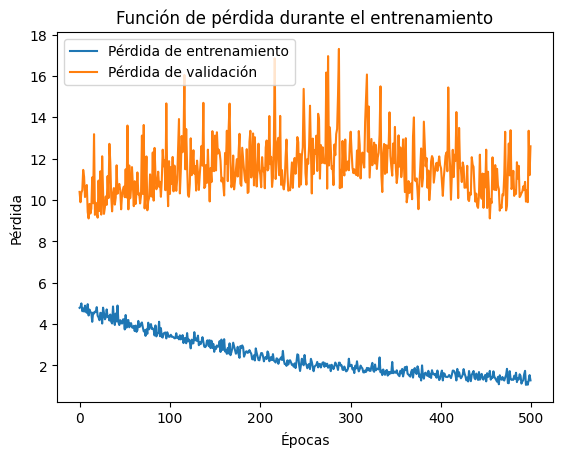

In [35]:
import matplotlib.pyplot as plt

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


In [36]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.6373 - root_mean_squared_error: 3.3936
Test Mean Absolute Error: 3.55


In [37]:
predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
     Actual  Predicted
82     23.0  21.418074
167    29.0  28.315292
356    32.4  33.730221
120    19.0  20.369392
385    38.0  35.157345


In [38]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')


R²: 0.8183064441630612
MSE: 12.59541069367586
